In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as pl
import joblib
import seaborn as sns

In [25]:
data = pd.read_csv("extracted_audio_features.csv")

In [26]:
data.head()

,Audio File,Category,Spectral Centroid,Spectral Bandwidth,Spectral Roll-Off,Zero Crossing Rate,RMS Energy,Temporal Entropy
0,blues.00000.wav,blues,1784.416546,2002.657106,3806.418650,0.083066,0.130192,54970.140
1,blues.00001.wav,blues,1529.871314,2038.612143,3548.986873,0.056044,0.095892,36836.254
2,blues.00002.wav,blues,1552.637786,1747.382028,3041.089944,0.076301,0.175494,80587.240
3,blues.00003.wav,blues,1070.110059,1596.244204,2185.061787,0.033309,0.141139,64873.477
4,blues.00004.wav,blues,1835.507009,1748.367477,3581.003346,0.101500,0.091540,33436.820


In [27]:
target_column = 'Category'

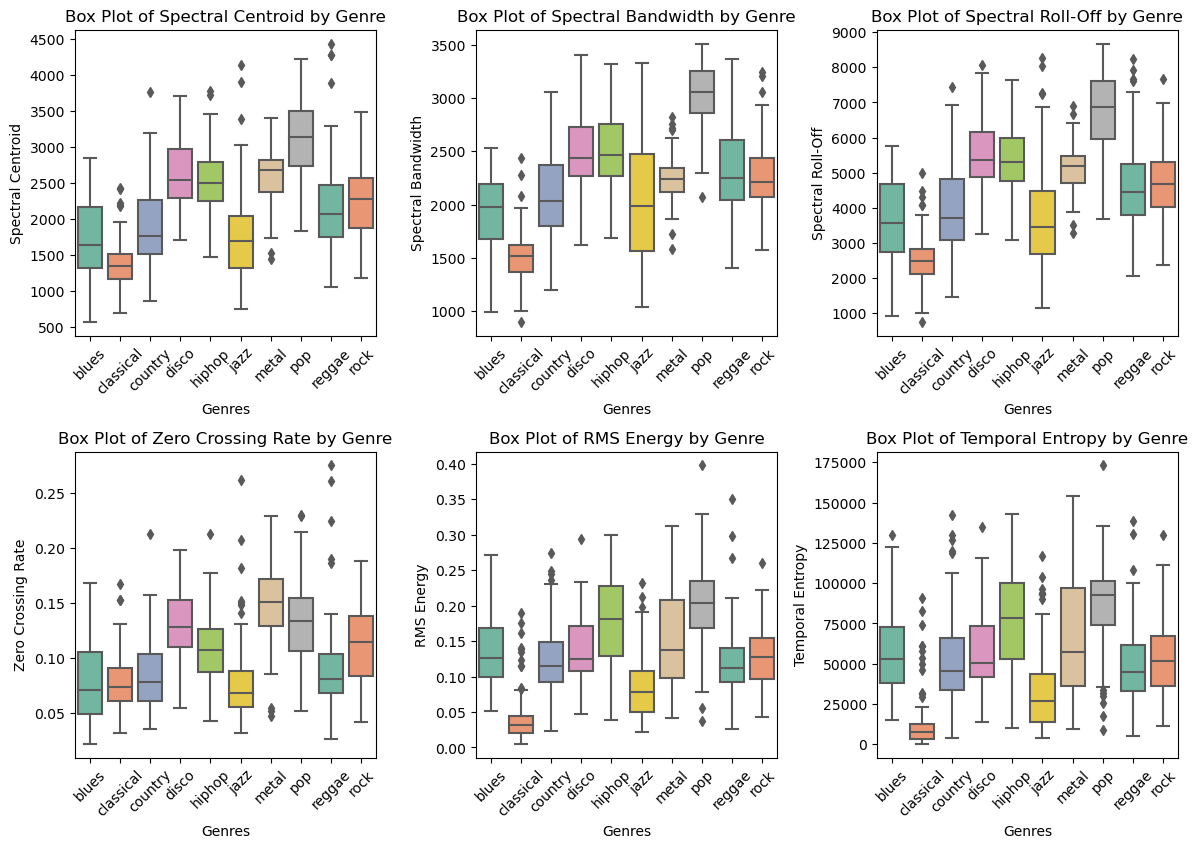

In [31]:
feature_columns = data.drop(columns=['Category', 'Audio File']).columns

plt.figure(figsize=(12, 12))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(len(feature_columns) // 3 + 1, 3, i)
    sns.boxplot(x=target_column, y=feature, data=data, palette='Set2')
    plt.title(f'Box Plot of {feature} by Genre')
    plt.xlabel('Genres')
    plt.ylabel(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


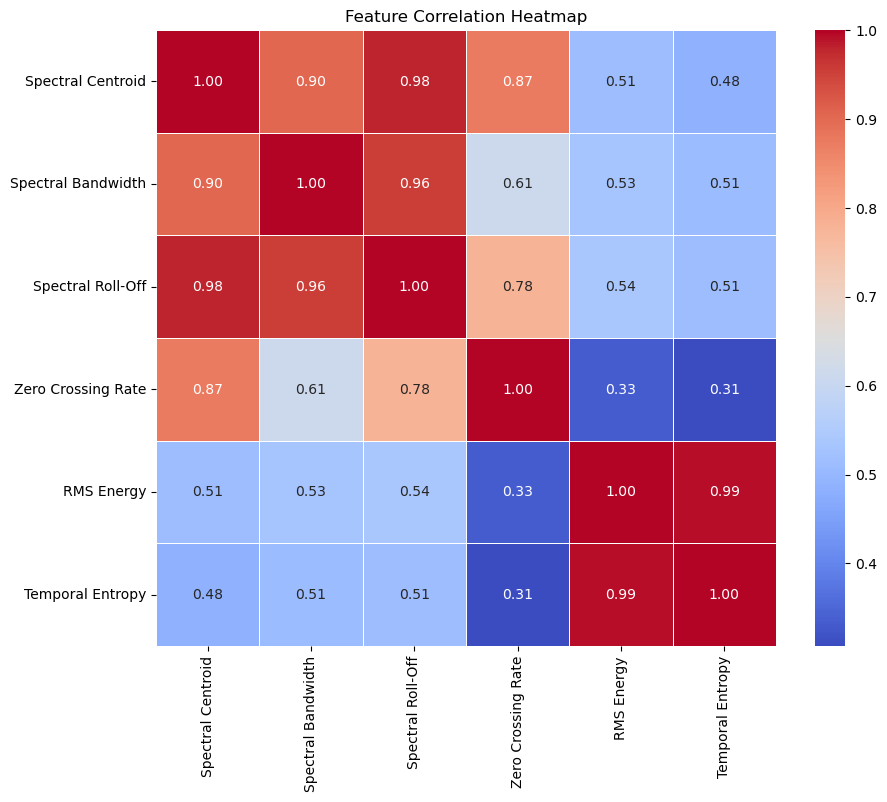

In [29]:
features = data.drop(columns=['Category', 'Audio File'])

correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
X = data.drop(columns=['Audio File', 'Category'])
y = data['Category']

In [7]:
X.columns

Index(['Spectral Centroid', 'Spectral Bandwidth', 'Spectral Roll-Off',
       'Zero Crossing Rate', 'RMS Energy', 'Temporal Entropy'],
      dtype='object')

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [11]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.42


In [13]:
joblib.dump(rf_classifier, "ml_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [14]:
classification_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:\n", classification_report)


Classification Report:
               precision    recall  f1-score   support

       blues       0.39      0.40      0.39        35
   classical       0.77      1.00      0.87        20
     country       0.25      0.11      0.15        37
       disco       0.48      0.39      0.43        33
      hiphop       0.40      0.32      0.36        31
        jazz       0.54      0.56      0.55        34
       metal       0.35      0.68      0.46        22
         pop       0.52      0.58      0.55        26
      reggae       0.33      0.45      0.38        31
        rock       0.14      0.10      0.12        31

    accuracy                           0.42       300
   macro avg       0.42      0.46      0.43       300
weighted avg       0.40      0.42      0.40       300



In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

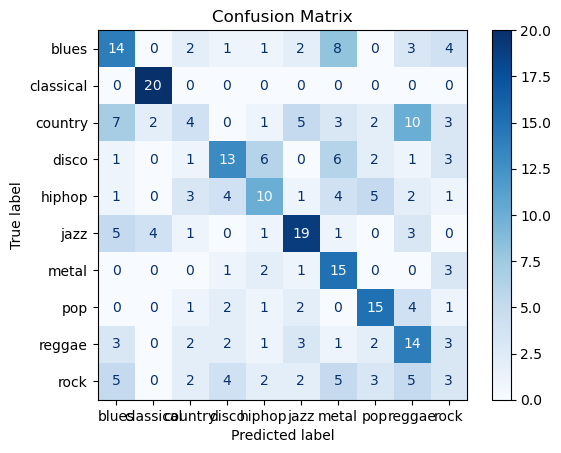

In [16]:
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [17]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

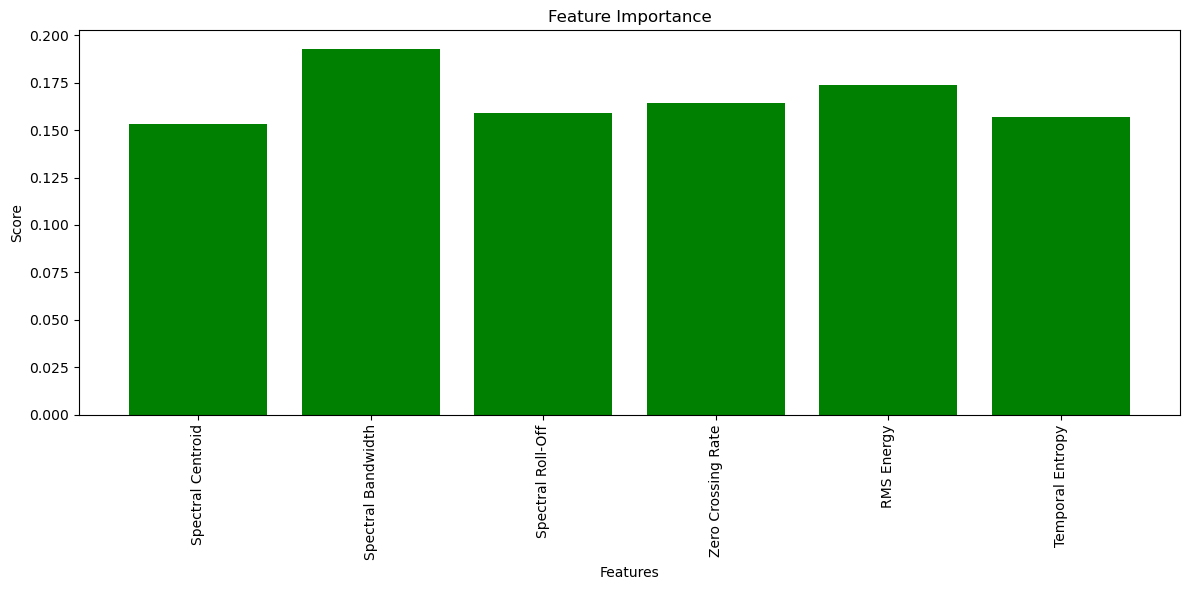

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances, align='center', color='green')
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.title("Feature Importance")
plt.ylabel("Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()